# MLP Implementation
### A code that implements MLP with multiple layers
By Isu Kim @ https://github.com/isu-kim

In [2]:
import numpy as np
import random

In [3]:
import random


def train_validate_split(x, y, train_percentage):
    """
    A function that splits train data and validate data with given ratio
    
    @param x: The list of x.
    @param y: The list of y.
    @param train_percentage: The total train data's percentage. 0.8 for 80%
    @return: tuple in train_x, train_y, validate_x, validate_y
    """
    all_data = [i for i in range(len(x))]
    selected = list()
    for i in range(int(train_percentage * len(x))):
        choice = random.choice(all_data)
        selected.append(choice)
        all_data.remove(choice)
    
    print("Total Train : " + str(len(selected)) + " / Total Validation : " + str(len(all_data)))
    
    train_x = [x[i] for i in selected]
    train_y = [y[i] for i in selected]
    validate_x = [x[i] for i in all_data]
    validate_y = [y[i] for i in all_data]
    
    return train_x, train_y, validate_x, validate_y

In [4]:
class ActivationFunction:
    """
    A class that includes all methods for activation functions.
    """
    def sigmoid(x):
        """
        The sigmoid function.
        @param x: The x value to calculate sigmoid
        @return: sigmoid(x) value
        """
        return 1/(1 + np.exp(-x))
    def relu(x):
        """
        The ReLU function.
        @param x: The x value to calculate ReLU
        @return: ReLU(x) value        
        """
        return np.maximum(0, x)
    def linear(x):
        """
        The identity function.
        @param x: The x value to calculate identity
        @return: x value     
        """
        return x
    def tanh(x):
        """
        The tanh function.
        @param x: The x value to calculate tanh
        @return: tanh(x)  
        """
        return np.tanh(x)
    
    
class ActivationFunctionDerivative:
    """
    A class that includes all methods for derivative of activiation functions.
    """
    def sigmoid(x):
        """
        The derivative of sigmoid function.
        @param x: The x value to calculate derivative sigmoid
        @return: derivative of sigmoid(x) value
        """
        return ActivationFunction.sigmoid(x) * (1 - ActivationFunction.sigmoid(x))
    def relu(x):
        """
        The derivative of ReLU function.
        @param x: The x value to calculate derivative ReLU
        @return: derivative of ReLU(x) value
        """
        if x > 0:
            return 1
        else:
            return 0
    def linear(x):
        """
        The derivative of linear function.
        @param x: The x value to calculate derivative linear
        @return: derivative of linear(x) value
        """
        return 1
    def tanh(x):
        """
        The derivative of tanh function.
        @param x: The x value to calculate derivative tanh
        @return: derivative of tanh(x) value
        """
        return 1 - (np.tanh(x)) ** 2

In [6]:
class Node:
    """
    A class that defines and implements a node (perceptron)
    """
    def __init__(self, activation_function, layer_count, node_count):
        """
        Intializer method for class Node.
        @param activiation_function: The type of activiation function.
        @param layer_count: Which layer this node is residing in.
        @param node_count: Which index is this node located at from the layer.
        """
        self.activation = None
        self.activiation_derivative = None
        self.z = 0
        self.h = 0
        self.layer_count = layer_count
        self.node_count = node_count
        self.weights = list()

        try:  # Set activation function.
            self.activation = eval("ActivationFunction." + activation_function)
            self.activiation_derivative = eval("ActivationFunctionDerivative." + activation_function)
        except AttributeError:
            print("[ERROR] Invalid Activation function : " + activation_function)
            raise ValueError 

    def get_derivative_z(self):
        """
        A method that calculates derivative of this node and inputs z.
        This is for calculating backpropagation.
        """
        return self.activiation_derivative(self.z)        
    
    def calc_h(self):
        """
        A method that calculates h of current node.
        This is for calculating forward propagation.
        """
        self.h = self.activation(self.z)
    
    def __repr__(self):
        """
        A __repr__ method for class Node.
        @return: The node information.
        """ 
        ret = "Node " + str(self.node_count) + " at Layer : " + str(self.layer_count)
        #ret += "\nz: " + str(self.z) + " / h: " + str(self.h)
        return ret

In [7]:
class Weight:
    """
    A class that defines and implementes a weight.
    """
    def __init__(self, from_node, to_node):
        """
        Initializer method for class Weight
        @param from_node: The node that this weight is coming from.
        @param to_node: The node that this weight is heading into.
        """
        self.from_node = from_node
        self.to_node = to_node
        self.value = random.random()  # Initialize random weight
        #self.value = 1  # Fix it 1
    
    def __repr__(self):
        """
        A __repr__ method for class Weight.
        @return: The weight information.
        """
        return "Weight : " + str(self.from_node.layer_count) + "'s " + str(self.from_node.node_count) + " -> " + str(self.to_node.layer_count) + "'s " + str(self.to_node.node_count) + "\nValue: " + str(self.value) 

In [8]:
class Layer:
    """
    A class that defines and implements a layer.
    """
    def __init__(self, layer_index, nodes, activiation, is_output_layer):
        """
        Initializer method for class Layer.
        @param layer_index: The current layer's index.
        @param nodes: The list of nodes that this layer will be getting.
        @param activiation: The activation function of this layer.
        @param is_output_layer: Whether or not this layer is the output layer.
        """
        self.activation = activiation
        self.nodes = nodes
        self.weights = list()
        self.layer_index = layer_index
        self.is_output_layer = is_output_layer
        
        if not is_output_layer:
            bias = Node("linear", layer_index, "bias")
            bias.h = 1
            self.nodes.append(bias)
        
    def set_weights(self, weights):
        """
        A method that sets weights
        @param weights: The list object of Weights.
        """
        self.weights = weights
        
    def __repr__(self):
        """
        A __repr__ method for class Layer.
        @return: The layer information.
        """
        ret = "===== Layer " + str(self.layer_index) + " =====\n"
        ret += "Activiation: " + str(self.activation) + "\n"
        ret += "Node Count (Including Bias): " + str(len(self.nodes)) + "\n"
        ret += "Weight Count: " + str(len(self.weights)) +"\n"
        if self.is_output_layer:
            ret += "===== Output ====="
        return ret

In [14]:
class Network:
    """
    A class that defines and implements a network.
    """
    def __init__(self, layer_node_counts, layer_activiation_functions):
        """
        Initializer method for class Network.
        @param layer_node_counts: The tuple including each layer's perceptron counts.
        @param layer_activiation_functions: The tuple including each layer's activiation functions.
        """
        if (len(layer_node_counts) != len(layer_activiation_functions)):
            print("[ERROR] Layer information mismatch.")
            raise ValueError
            
        self.layers = list()
        self.min = 0
        self.max = 0 
        self.mid = 0
        layer_count = 0
        # Generate Layers.
        for node_count, activiation_function in zip(layer_node_counts, layer_activiation_functions):
            tmp_nodes = list()
            for i in range(node_count):
                new_node = Node(activiation_function, layer_count + 1, i)
                tmp_nodes.append(new_node)
            self.layers.append(Layer(layer_count + 1, tmp_nodes, activiation_function, layer_count == len(layer_node_counts) - 1))
            layer_count += 1
        
        # Generate Weights.
        for i in range(len(layer_node_counts) - 1):
            tmp_weight_list = list()
            for from_node in self.layers[i].nodes:  # For all from -> to nodes, make a weight, exclude bias nodes.
                for to_node in self.layers[i + 1].nodes:  # Don't connect weight to the next level's bias
                    if to_node.node_count == "bias":
                        continue
                    new_weight = Weight(from_node, to_node)
                    tmp_weight_list.append(new_weight)
                    from_node.weights.append(new_weight)
            self.layers[i].set_weights(tmp_weight_list)
    
    def _forward_propagate(self, x):
        """
        A method that forward propagates.
        This will set all values of z and h in all nodes.
        Everytime this function is called, this will reset previous z and h value.
        
        @param x: The x value to forward propgate.
        """        
        self.layers[0].nodes[0].h = x  # Set input as x
        
        # Before setting new values, clear before z and h.
        for layer in self.layers[1:]:  # Start from 2nd layer.
            for node in layer.nodes: 
                if node.node_count == "bias":  # If this was bias, keep it.
                    continue
                else:  # If not, set it 0.
                    node.h = 0
                    node.z = 0
        
        for layer in self.layers: # For all layers, forward propagate.
            for node in layer.nodes:  # Grab nodes from layers.
                if layer.layer_index != 1 and node.node_count != "bias":   # If current node was not the input layer or it was not bias, calculate h.
                    node.calc_h()
                for weight in node.weights:  # Calculate each weight * h value. 
                    target_node = weight.to_node
                    target_node.z += node.h * weight.value
                    #print("Adding " + str(node.h * weight.value) + " to " + str(target_node))
                
    def _r_get_chain_rules(self, this_node, indent):
        """
        A method that gets chain rules in recursive way.
        This will generate all chain rule values in a DFS way.
        
        @param this_node: The node that this current recursive function is visiting.
        @param indent: For debug usage. Do not use this argument.
        """
        if len(this_node.weights) == 0:
            return 1
        else:
            tmp = 0
            for weight in this_node.weights:
                tmp += self._r_get_chain_rules(weight.to_node, indent + 1) * weight.value  # Do recursion.
            return tmp * this_node.get_derivative_z()
    
    def _back_propagate(self, x, y, learning_rate):
        """
        A method that backpropagates.
        This will call _forward_propagate internally and then backpropagate with using GD as its optimizer.
        
        @param x: The x value to input.
        @param y: The y value as output.
        @param learning_rate: The learning rate to be used when backpropagating.
        """
        self._forward_propagate(x)
        self.layers[-1].nodes[0].calc_h()
                
        y_hat = self.layers[-1].nodes[0].z
        for layer in self.layers:
            for weight in layer.weights:
                recursive_value = self._r_get_chain_rules(weight.to_node, 0)
                weight.value = weight.value - learning_rate * (y_hat - y) * 1 * weight.from_node.h * recursive_value

                
    def predict(self, x):
        """
        A function that predicts value from x.
        This function will interally call _forward_propagate.
        Then will return value of z in the last output node.
        
        @param x: The x value to predict.
        @return: The valut that this model predicted.
        """
        self._forward_propagate(x)
        return self.layers[-1].nodes[0].z
    
    def fit(self, x_data, y_data, epoch, learning_rate):
        """
        A method that fits our model into the data.
        
        @param x_data: tuple object that includes x data.
        @param y_data: tuple object that includes y data.
        @param epoch: Total count of epochs to iterate.
        @param learning_rate: The learning rate to be used when backpropagating.
        """
        self.max_y = max(y_data)
        self.min_y = min(y_data)
        self.mid = (self.max_y + self.min_y) / 2
        
        for i in range(epoch):
            for x, y in zip(x_data, y_data):
                self._back_propagate(x, y, learning_rate)
            print("Epoch " + str(i) + " | " + str(epoch) + " / Training Loss : " + str(self.get_cost(x_data, y_data)))

    
    def get_cost(self, x_data, y_data):
        """
        A method that calculates MSE value with given dataset.
        
        @param x_data: tuple object that includes x data.
        @param y_data: tuple object that includes y data. 
        @return: The MSE value of the model.
        """
        total = 0
        for x, y in zip(x_data, y_data):
            y_hat = self.predict(x)
            total += (y_hat - y) ** 2
        return total / 2
    
    def __repr__(self):
        """
        A __repr__ method for class Network. 
        
        @return: The network information
        """
        ret = ""
        for layer in self.layers:
            ret += str(layer)
        return ret

In [17]:
import pandas as pd
df = pd.read_csv("hw3_data.csv")

y = list(df.y)
x = list(df.x)

train_x, train_y, validate_x, validate_y = train_validate_split(x, y, 0.8)

Total Train : 4000 / Total Validation : 1000


## Normal Fit with single Sigmoid

In [18]:
n1 = Network((1,2,1), ('linear', 'sigmoid', 'linear'))

In [19]:
n1

===== Layer 1 =====
Activiation: linear
Node Count (Including Bias): 2
Weight Count: 4
===== Layer 2 =====
Activiation: sigmoid
Node Count (Including Bias): 3
Weight Count: 3
===== Layer 3 =====
Activiation: linear
Node Count (Including Bias): 1
Weight Count: 0
===== Output =====

In [20]:
n1.fit(x, y, 10, 0.01)

Epoch 0 | 10 / Training Loss : 6.056653080994851e+02
Epoch 1 | 10 / Training Loss : 5.254607179252558e+02
Epoch 2 | 10 / Training Loss : 4.975042169655134e+02
Epoch 3 | 10 / Training Loss : 4.636989838836882e+02
Epoch 4 | 10 / Training Loss : 4.2164048489411016e+02
Epoch 5 | 10 / Training Loss : 3.756166273890967e+02
Epoch 6 | 10 / Training Loss : 3.332303765747995e+02
Epoch 7 | 10 / Training Loss : 3.11146985127094e+02
Epoch 8 | 10 / Training Loss : 3.123465111127894e+02
Epoch 9 | 10 / Training Loss : 3.188713945954729e+02


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Validate Loss: 6.387521847234315e+01


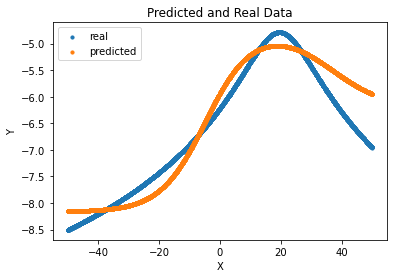

In [26]:
predicted = list()
for i in x:
    predicted.append(n1.predict(i))
    
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('multi_layer_demo_1.eps')

print("Validate Loss: " + str(n1.get_cost(validate_x, validate_y)))

## Lucky overfitting 2
This is very lucky case. There are potential of not being reproduced again.

In [81]:
activations = ['linear']
for i in range(2):
    activations.append('sigmoid')
for i in range(2):
    activations.append('linear')
activations.append('linear')

In [82]:
n3 = Network([3 for x in range(6)], activations)

In [83]:
n3.fit(train_x, train_y, 50, 0.001)

Epoch 0 | 50 / Training Loss : 7.035221442037986e+02
Epoch 1 | 50 / Training Loss : 6.120955790815285e+02
Epoch 2 | 50 / Training Loss : 5.39578960814537e+02
Epoch 3 | 50 / Training Loss : 4.946254597188518e+02
Epoch 4 | 50 / Training Loss : 4.7066170825200277e+02
Epoch 5 | 50 / Training Loss : 4.5727995358846374e+02
Epoch 6 | 50 / Training Loss : 4.479763285015599e+02
Epoch 7 | 50 / Training Loss : 4.400320132270548e+02
Epoch 8 | 50 / Training Loss : 4.3237087982084165e+02
Epoch 9 | 50 / Training Loss : 4.2429491588859327e+02
Epoch 10 | 50 / Training Loss : 4.1524975811114354e+02
Epoch 11 | 50 / Training Loss : 4.053496435271982e+02
Epoch 12 | 50 / Training Loss : 3.959922616108687e+02
Epoch 13 | 50 / Training Loss : 3.8960267138547374e+02
Epoch 14 | 50 / Training Loss : 3.880510960307237e+02
Epoch 15 | 50 / Training Loss : 3.9017863187860934e+02
Epoch 16 | 50 / Training Loss : 3.910903935795193e+02
Epoch 17 | 50 / Training Loss : 3.854872831996595e+02
Epoch 18 | 50 / Training Loss : 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Validate Loss: 1.3008706617533703e+00


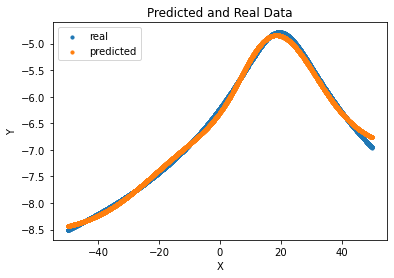

In [87]:
predicted = list()
for i in x:
    predicted.append(n3.predict(i))
    
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('multilayer_overfitted_new.eps')
print("Validate Loss: " + str(n3.get_cost(validate_x, validate_y)))

## Failure
Due to too many layers

In [27]:
activations = ['linear']
for i in range(6):
    activations.append('sigmoid')
for i in range(2):
    activations.append('linear')
activations.append('linear')

In [28]:
n2 = Network([1 for x in range(10)], activations)

In [29]:
n2.fit(train_x, train_y, 50, 0.001)

Epoch 0 | 50 / Training Loss : 2.808521618246649e+03
Epoch 1 | 50 / Training Loss : 2.8078127449033764e+03
Epoch 2 | 50 / Training Loss : 2.807106622095134e+03
Epoch 3 | 50 / Training Loss : 2.806403092900071e+03
Epoch 4 | 50 / Training Loss : 2.805702013452452e+03
Epoch 5 | 50 / Training Loss : 2.8050032518493176e+03
Epoch 6 | 50 / Training Loss : 2.804306687157531e+03
Epoch 7 | 50 / Training Loss : 2.8036122085111306e+03
Epoch 8 | 50 / Training Loss : 2.802919714290056e+03
Epoch 9 | 50 / Training Loss : 2.802229111372349e+03
Epoch 10 | 50 / Training Loss : 2.8015403144526604e+03
Epoch 11 | 50 / Training Loss : 2.800853245420593e+03
Epoch 12 | 50 / Training Loss : 2.8001678327933223e+03
Epoch 13 | 50 / Training Loss : 2.7994840111973235e+03
Epoch 14 | 50 / Training Loss : 2.7988017208944084e+03
Epoch 15 | 50 / Training Loss : 2.798120907348264e+03
Epoch 16 | 50 / Training Loss : 2.7974415208274368e+03
Epoch 17 | 50 / Training Loss : 2.796763516041642e+03
Epoch 18 | 50 / Training Loss 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Validate Loss: 7.237969180951641e+02


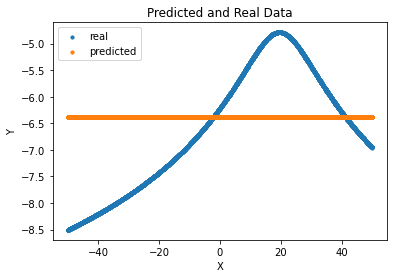

In [92]:
predicted = list()
for i in x:
    predicted.append(n2.predict(i))
    
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('multilayer_failure_1.eps')
print("Validate Loss: " + str(n2.get_cost(validate_x, validate_y)))

# Normal Case
Falling into local minimum

In [88]:
activations = ['linear']
for i in range(2):
    activations.append('sigmoid')
for i in range(1):
    activations.append('linear')
activations.append('linear')

In [89]:
n4 = Network((5, 5, 5, 5, 1), activations)

In [91]:
n4.fit(train_x, train_y, 50, 0.01)

Epoch 0 | 50 / Training Loss : 6.052081632123875e+02
Epoch 1 | 50 / Training Loss : 5.771055684282235e+02
Epoch 2 | 50 / Training Loss : 5.62290040407965e+02
Epoch 3 | 50 / Training Loss : 5.50085018808041e+02
Epoch 4 | 50 / Training Loss : 5.412652601304679e+02
Epoch 5 | 50 / Training Loss : 5.346223975168834e+02
Epoch 6 | 50 / Training Loss : 5.292969817596002e+02
Epoch 7 | 50 / Training Loss : 5.248042391811053e+02
Epoch 8 | 50 / Training Loss : 5.208657719090056e+02
Epoch 9 | 50 / Training Loss : 5.173135677765886e+02
Epoch 10 | 50 / Training Loss : 5.140421249590195e+02
Epoch 11 | 50 / Training Loss : 5.109829735371006e+02
Epoch 12 | 50 / Training Loss : 5.08089613268617e+02
Epoch 13 | 50 / Training Loss : 5.053283233295613e+02
Epoch 14 | 50 / Training Loss : 5.02673054246813e+02
Epoch 15 | 50 / Training Loss : 5.0010307073070595e+02
Epoch 16 | 50 / Training Loss : 4.9760204507807754e+02
Epoch 17 | 50 / Training Loss : 4.9515765614618454e+02
Epoch 18 | 50 / Training Loss : 4.92761

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Validate Loss: 1.1327997824922382e+02


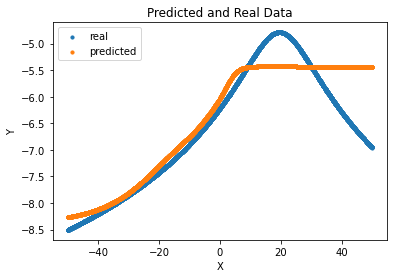

In [95]:
predicted = list()
for i in x:
    predicted.append(n4.predict(i))
    
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('multilayer_failure_normal.eps')
print("Validate Loss: " + str(n4.get_cost(validate_x, validate_y)))

# Fine Tuning

In [185]:
import copy
n5 = copy.deepcopy(n4)

In [187]:
n5.fit(x, y, 10, 0.001)

Epoch 0 / 10 / Loss : 3.254593954417345e+00
Epoch 1 / 10 / Loss : 3.1261299497495614e+00
Epoch 2 / 10 / Loss : 3.0220872834187125e+00
Epoch 3 / 10 / Loss : 2.934679689454221e+00
Epoch 4 / 10 / Loss : 2.8589679963181047e+00
Epoch 5 / 10 / Loss : 2.7917187418172227e+00
Epoch 6 / 10 / Loss : 2.730758318388614e+00
Epoch 7 / 10 / Loss : 2.6745917762758156e+00
Epoch 8 / 10 / Loss : 2.622170168448672e+00
Epoch 9 / 10 / Loss : 2.572744370813474e+00


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


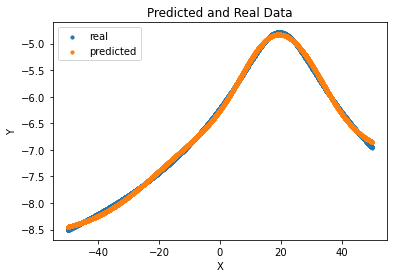

In [189]:
predicted = list()
for i in x:
    predicted.append(n5.predict(i))
    
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('multilayer_overfit_case3.eps')

In [190]:
import copy
n6 = copy.deepcopy(n5)
n6.fit(x, y, 10, 0.001)

Epoch 0 / 10 / Loss : 2.525770857535687e+00
Epoch 1 / 10 / Loss : 2.480849573639397e+00
Epoch 2 / 10 / Loss : 2.4376821368441526e+00
Epoch 3 / 10 / Loss : 2.3960432063560395e+00
Epoch 4 / 10 / Loss : 2.3557605531503727e+00
Epoch 5 / 10 / Loss : 2.3167009860414356e+00
Epoch 6 / 10 / Loss : 2.2787602835533822e+00
Epoch 7 / 10 / Loss : 2.2418559068817365e+00
Epoch 8 / 10 / Loss : 2.205921669640721e+00
Epoch 9 / 10 / Loss : 2.170903801153849e+00


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


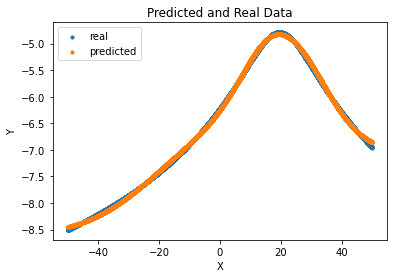

In [192]:
predicted = list()
for i in x:
    predicted.append(n6.predict(i))
    
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('multilayer_overfit_case4.eps')

In [193]:
import copy
n7 = copy.deepcopy(n6)
n7.fit(x, y, 10, 0.001)

Epoch 0 / 10 / Loss : 2.1367580131045667e+00
Epoch 1 / 10 / Loss : 2.1034472958594495e+00
Epoch 2 / 10 / Loss : 2.070940250313533e+00
Epoch 3 / 10 / Loss : 2.03920981612894e+00
Epoch 4 / 10 / Loss : 2.008232295763155e+00
Epoch 5 / 10 / Loss : 1.9779866009486395e+00
Epoch 6 / 10 / Loss : 1.9484536677752722e+00
Epoch 7 / 10 / Loss : 1.919616000571048e+00
Epoch 8 / 10 / Loss : 1.8914573149725165e+00
Epoch 9 / 10 / Loss : 1.8639622580132598e+00


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


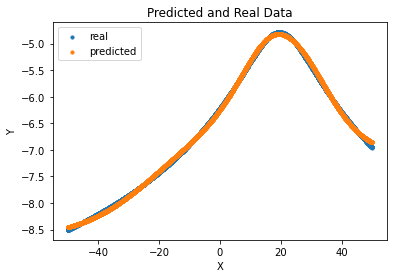

In [195]:
predicted = list()
for i in x:
    predicted.append(n7.predict(i))
    
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('multilayer_overfit_case5.eps')

In [196]:
import copy
n8 = copy.deepcopy(n7)
n8.fit(x, y, 20, 0.001)

Epoch 0 / 20 / Loss : 1.8371161885189815e+00
Epoch 1 / 20 / Loss : 1.8109050051085824e+00
Epoch 2 / 20 / Loss : 1.7853150120693246e+00
Epoch 3 / 20 / Loss : 1.760332815570156e+00
Epoch 4 / 20 / Loss : 1.7359452443156662e+00
Epoch 5 / 20 / Loss : 1.712139289969853e+00
Epoch 6 / 20 / Loss : 1.6889020636076693e+00
Epoch 7 / 20 / Loss : 1.6662207651609509e+00
Epoch 8 / 20 / Loss : 1.644082663377449e+00
Epoch 9 / 20 / Loss : 1.6224750842435904e+00
Epoch 10 / 20 / Loss : 1.6013854061694799e+00
Epoch 11 / 20 / Loss : 1.5808010605179763e+00
Epoch 12 / 20 / Loss : 1.5607095362917425e+00
Epoch 13 / 20 / Loss : 1.5410983879874411e+00
Epoch 14 / 20 / Loss : 1.521955245792662e+00
Epoch 15 / 20 / Loss : 1.5032678274369222e+00
Epoch 16 / 20 / Loss : 1.4850239511306247e+00
Epoch 17 / 20 / Loss : 1.4672115491236972e+00
Epoch 18 / 20 / Loss : 1.4498186815039504e+00
Epoch 19 / 20 / Loss : 1.4328335499250544e+00


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


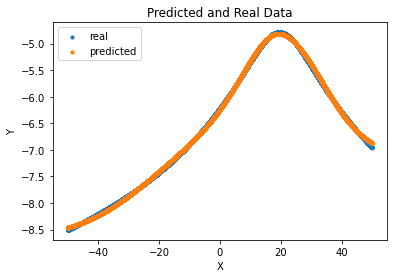

In [200]:
predicted = list()
for i in x:
    predicted.append(n8.predict(i))
    
import matplotlib.pyplot as plt

plt.scatter(df.x, df.y, label='real', s=10)
plt.scatter(df.x, predicted, label='predicted', s=10)
plt.title("Predicted and Real Data")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('multilayer_overfit_case6.eps')

In [201]:
import copy
n9 = copy.deepcopy(n8)
n9.fit(x, y, 20, 0.001)

Epoch 0 / 20 / Loss : 1.416244511018528e+00
Epoch 1 / 20 / Loss : 1.4000400892939617e+00
Epoch 2 / 20 / Loss : 1.384208989374342e+00
Epoch 3 / 20 / Loss : 1.3687401074523229e+00
Epoch 4 / 20 / Loss : 1.3536225418803063e+00
Epoch 5 / 20 / Loss : 1.3388456028338684e+00
Epoch 6 / 20 / Loss : 1.3243988210090485e+00
Epoch 7 / 20 / Loss : 1.3102719553299416e+00
Epoch 8 / 20 / Loss : 1.2964549996582866e+00
Epoch 9 / 20 / Loss : 1.282938188509134e+00
Epoch 10 / 20 / Loss : 1.269712001784373e+00
Epoch 11 / 20 / Loss : 1.256767168545772e+00
Epoch 12 / 20 / Loss : 1.2440946698566873e+00
Epoch 13 / 20 / Loss : 1.231685740724336e+00
Epoch 14 / 20 / Loss : 1.2195318711822296e+00
Epoch 15 / 20 / Loss : 1.2076248065539914e+00
Epoch 16 / 20 / Loss : 1.1959565469440454e+00
Epoch 17 / 20 / Loss : 1.1845193460026968e+00
Epoch 18 / 20 / Loss : 1.1733057090141361e+00
Epoch 19 / 20 / Loss : 1.1623083903589249e+00


In [203]:
n9.layers[0]

===== Layer 1 =====
Activiation: linear
Node Count (Including Bias): 6
Weight Count: 30